## Primer modelo, sin feature engineering ni tuning de parametros

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
train = pd.read_pickle('../cleaned_train.pkl')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   damage_grade                            260601 non-null  int8    
 2   geo_level_1_id                          260601 non-null  int8    
 3   geo_level_2_id                          260601 non-null  int16   
 4   geo_level_3_id                          260601 non-null  int16   
 5   count_floors_pre_eq                     260601 non-null  int8    
 6   age                                     260601 non-null  int16   
 7   area_percentage                         260601 non-null  int8    
 8   height_percentage                       260601 non-null  int8    
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

In [3]:
test = pd.read_pickle('../cleaned_test.pkl')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   building_id                             86868 non-null  int32   
 1   geo_level_1_id                          86868 non-null  int8    
 2   geo_level_2_id                          86868 non-null  int16   
 3   geo_level_3_id                          86868 non-null  int16   
 4   count_floors_pre_eq                     86868 non-null  int8    
 5   age                                     86868 non-null  int16   
 6   area_percentage                         86868 non-null  int8    
 7   height_percentage                       86868 non-null  int8    
 8   land_surface_condition                  86868 non-null  category
 9   foundation_type                         86868 non-null  category
 10  roof_type                               86868 

In [4]:
cat_cols = train.select_dtypes(include=['category']).columns.to_list()
cat_cols

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [5]:
oneHot = pd.get_dummies(train[cat_cols], prefix=cat_cols)
oneHot.transpose()

,0,1,2,3,4,5,6,7,8,9,...,260591,260592,260593,260594,260595,260596,260597,260598,260599,260600
land_surface_condition_n,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
land_surface_condition_o,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
land_surface_condition_t,1,0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
foundation_type_h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
foundation_type_i,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
foundation_type_r,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
foundation_type_u,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
foundation_type_w,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
roof_type_n,1,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,0,1
roof_type_q,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
train = train.drop(columns=cat_cols)
train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,True,...,False,False,False,False,False,False,False,False,False,False
1,28830,2,8,900,2812,2,10,8,7,False,...,False,False,False,False,False,False,False,False,False,False
2,94947,3,21,363,8973,2,10,5,5,False,...,False,False,False,False,False,False,False,False,False,False
3,590882,2,22,418,10694,2,10,6,5,False,...,False,False,False,False,False,False,False,False,False,False
4,201944,3,11,131,1488,3,30,8,9,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,False,...,False,False,False,False,False,False,False,False,False,False
260597,669485,3,17,715,2060,2,0,6,5,False,...,False,False,False,False,False,False,False,False,False,False
260598,602512,3,17,51,8163,3,55,6,7,False,...,False,False,False,False,False,False,False,False,False,False
260599,151409,2,26,39,1851,2,10,14,6,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
train = pd.concat([train, oneHot], axis=1)
train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,3,6,487,12198,2,30,6,5,True,...,0,0,0,0,0,0,0,0,1,0
1,28830,2,8,900,2812,2,10,8,7,False,...,0,0,0,0,0,0,0,0,1,0
2,94947,3,21,363,8973,2,10,5,5,False,...,0,0,0,0,0,0,0,0,1,0
3,590882,2,22,418,10694,2,10,6,5,False,...,0,0,0,0,0,0,0,0,1,0
4,201944,3,11,131,1488,3,30,8,9,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,False,...,0,0,0,1,0,0,0,0,1,0
260597,669485,3,17,715,2060,2,0,6,5,False,...,0,0,0,0,0,0,0,0,1,0
260598,602512,3,17,51,8163,3,55,6,7,False,...,0,0,0,0,0,0,0,0,1,0
260599,151409,2,26,39,1851,2,10,14,6,False,...,0,0,0,0,0,0,0,0,1,0


In [8]:
oneHot = pd.get_dummies(test[cat_cols], prefix=cat_cols)

test = test.drop(columns=cat_cols)

test = pd.concat([test, oneHot], axis=1)
test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,False,True,...,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,False,True,...,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,False,True,...,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,False,False,...,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,False,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,False,True,...,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,True,True,...,0,0,0,0,0,0,0,0,1,0
86865,1049160,22,1136,7712,1,50,3,3,False,True,...,0,0,0,0,0,0,0,0,1,0
86866,442785,6,1041,912,2,5,9,5,True,True,...,0,0,0,0,0,0,1,0,0,0


In [9]:
X = train.drop(columns='damage_grade')
X = X.set_index('building_id')
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,False,True,False,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y = train.damage_grade
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int8

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
model = xgb.XGBClassifier(use_label_encoder=False)

In [23]:
model.fit(X_train, y_train-1)

[04:53:59] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [24]:
preds = model.predict(X_valid)

In [25]:
preds

array([1, 1, 0, ..., 2, 1, 1])

In [26]:
score = f1_score(y_valid-1, preds, average='micro')
print('Validation Score:', score)

Validation Score: 0.7249477178104795


In [27]:
score = f1_score(y_train-1, model.predict(X_train), average='micro')
print('Train Score:', score)

Train Score: 0.7481437068303913


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
df = pd.DataFrame(columns=X_train.columns)
df = df.T

In [30]:
df['feature importance'] = model.feature_importances_

In [31]:
top_features = df.sort_values('feature importance', ascending=False).head(35)
top_features

,feature importance
foundation_type_r,0.346178
ground_floor_type_v,0.099830
foundation_type_i,0.051945
geo_level_1_id,0.050618
has_superstructure_mud_mortar_stone,0.043999
has_superstructure_cement_mortar_brick,0.030336
other_floor_type_q,0.022292
roof_type_x,0.021443
has_superstructure_stone_flag,0.014266
has_superstructure_mud_mortar_brick,0.013660


<AxesSubplot:>

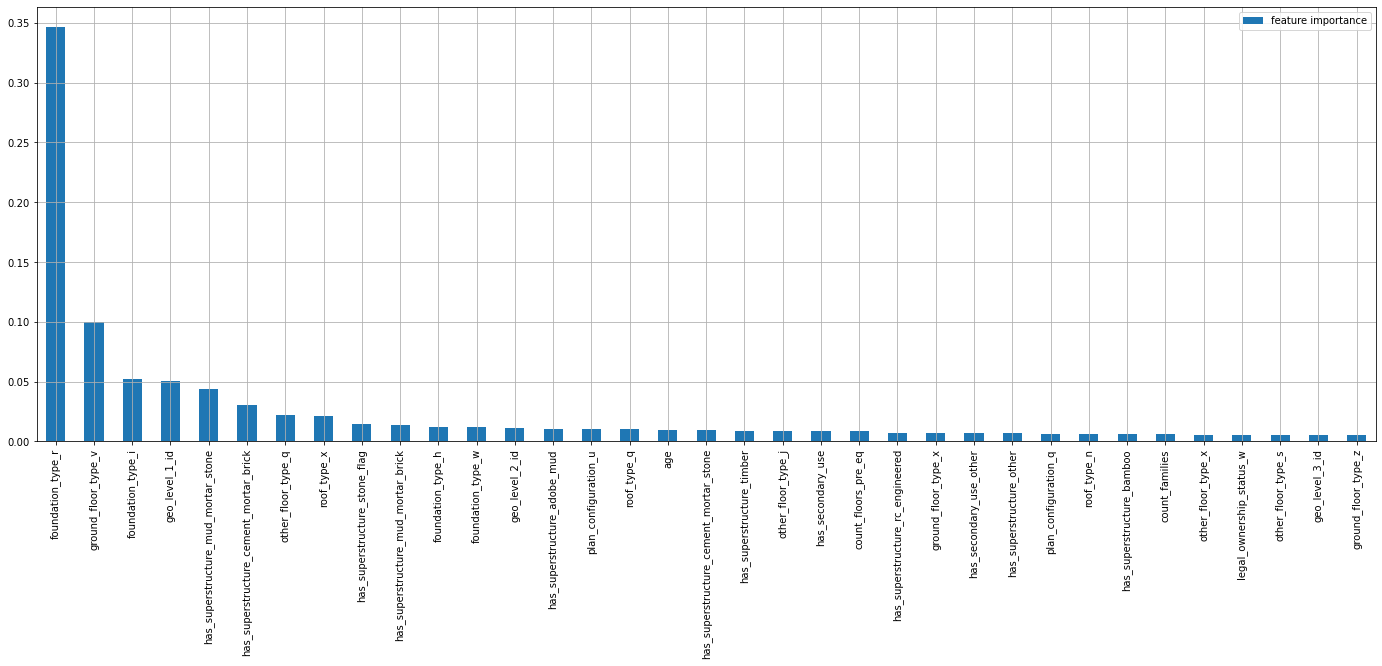

In [32]:
top_features.plot.bar(figsize = (24,8), grid=True)

In [23]:
test = test.set_index('building_id')
test

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,False,True,False,...,0,0,0,0,0,0,0,0,1,0
99355,6,141,11987,2,25,13,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
890251,22,19,10044,2,5,4,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
745817,26,39,633,1,0,19,3,False,False,False,...,0,0,0,0,0,0,0,0,1,0
421793,17,289,7970,3,15,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,False,True,False,...,0,0,0,0,0,0,0,0,0,1
663567,10,1407,11907,3,25,6,7,True,True,True,...,0,0,0,0,0,0,0,0,1,0
1049160,22,1136,7712,1,50,3,3,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [24]:
preds = model.predict(test)
preds

array([3, 2, 2, ..., 2, 2, 2], dtype=int8)

In [25]:
submission_format = pd.read_csv('../TP1/submission_format.csv', index_col='building_id')
submission_format

,damage_grade
building_id,
300051,1
99355,1
890251,1
745817,1
421793,1
...,...
310028,1
663567,1
1049160,1


In [26]:
my_submission = pd.DataFrame(data=preds, columns=submission_format.columns, index=submission_format.index)
my_submission

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3
...,...
310028,2
663567,2
1049160,2


In [27]:
my_submission.to_csv('Submits/FirstModel.csv')